In this note we examine the behavior of the following sample covariance matrix.  Let $Z$ be an $N \times M$ matrix of iid Gaussians with variance $1$.  We construct the following vector $\gamma_i$ from the $M$ quantiles of the measure,
$$
d H ( t ) = 64 (1 - t)^3 \mathbb{1}_{ \{ \frac{1}{2} < t <1 \} } dt
$$
via
$$
\frac{i-1}{N} = \int_{ \gamma_i}^{1} d H (t), \qquad \gamma_i = 1 - \frac{1}{2} \left( \frac{i-1}{N} \right)^{\frac{1}{4} }
$$
Then, the matrix we consider is $X$ with entries $X_{ij} = Z_{ij}\sqrt{ \gamma_j } $.  The sample covariance matrix we examine is then,
$$
H := \frac{1}{N} X^* X.
$$
Recall the function $\psi$ defined by
$$
\psi( \alpha ) = \alpha + \gamma \alpha \int \frac{ t d H (t) }{ \alpha - t }, \qquad \gamma = \frac{M}{N}.
$$
If we have the inequality,
$$
1 < \psi' (1) = 1 - \gamma \int \frac{ t^2 d H (t) }{ (1-t)^2} = 1 - \gamma \frac{11}{3},
$$
then the limiting DOS of $H$ has a power law tail.  Else, it has a square-root tail.

We are interested in the overlap of the top few sample eigenvectors with the population eigenvectors (which are just coordinate vectors).  From the theory, the right spectral edge is,
$$
\psi (1) = 1+5 \gamma/3,
$$
and the overlap function (for lack of better terminology) is,
$$
\frac{1 \psi' (1) }{ \psi (1) } = \frac{1 - \frac{11 \gamma}{3} } { 1+ \frac{5 \gamma}{3} }
$$

In [127]:
import matplotlib.pyplot as plt
import main
import imp
imp.reload(main)
import numpy as np

N = 2500
M = 500
gamma = M/N
n = 200
eig = np.zeros(n)
v = np.zeros((n, M))
est = np.zeros(n) 
for i in range(n):
    U, S, V, S2 = main.powerTailWishart(N, M)
    eig[i]=S[0]
    dif = S[0] -S2
    
    dif = 1 / dif
    es = gamma*np.mean(dif)*S[0] + (1 - gamma)
    es = es / (gamma*np.mean(dif*dif)*S[0]*S[0]+ (1- gamma) )
    

    est[i] = es
    v[i, :]=np.diag(V)
v = np.power(v, 2.0)

In [128]:
np.mean(est)

0.22095154730671093

In [129]:
print('Mean v_0^2=',np.mean(v[:, 0]))
print('Mean lambda_1=',np.mean(eig))

Mean v_0^2= 0.23908524721118898
Mean lambda_1= 1.3340838892231037


In [126]:
imp.reload(main)
1.001*main.psider(1.001)/main.Hemp(1.001)

0.2395818397509247

In [7]:
import matplotlib.pyplot as plt
import main
import imp
imp.reload(main)
import numpy as np

N = 2500
M = 500
gamma = M/N
n = 200

spikes = np.array([0.92, 0.94, 0.96, 0.98, 1, 1.2, 1.4, 1.6, 1.8, 2.0])-1.0
eigs = {}
v1 = {}
v2 = {}

for spike in spikes:
    eigs[str(spike)] = np.zeros(n)
    v1[str(spike)] = np.zeros((n, 10))
    v2[str(spike)] = np.zeros((n, 10))
    for i in range(n):
        U, S, V = main.powerLawSpiked(N, M, spike)
        eigs[str(spike)][i]=S[0]
        v1[str(spike)][i, :]= V[0, 0:10]
        v2[str(spike)][i, :]=V[1, 0:10]


In [8]:
v11 = np.zeros(len(spikes))
for i, spike in enumerate(spikes):
    v11[i] = np.mean(np.power(v1[str(spike)][:, 0], 2.0))

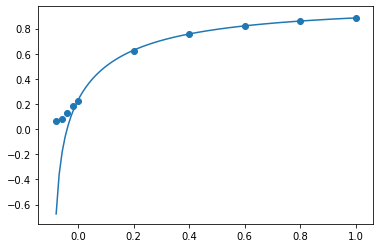

In [14]:
imp.reload(main)
x = np.arange(101)/100*1.08-0.08+1
y = np.zeros(len(x))
for i in range(len(x)):
    y[i] = main.eta(x[i])
plt.scatter(spikes, v11)
plt.plot(x-1, y)
plt.show()

In [15]:
J = np.array([])
for i in range(100):
    U, S, V = main.powerLawSpiked(N, M, 0.0)
    J = np.append(J, S)

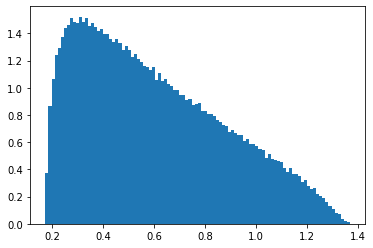

In [17]:
plt.hist(J, density=True, bins=100)
plt.show()